# Menyiapkan Library dan Dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['iris.csv', 'heart.csv', 'pima-indians-diabetes.csv', 'sonar.csv']

In [3]:
dataset_heart = pd.read_csv('heart.csv')
dataset_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


# EDA dan Future Engineering

In [4]:
dataset_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# melihat jumlah data label perkategorinya
dataset_heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
dataset_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


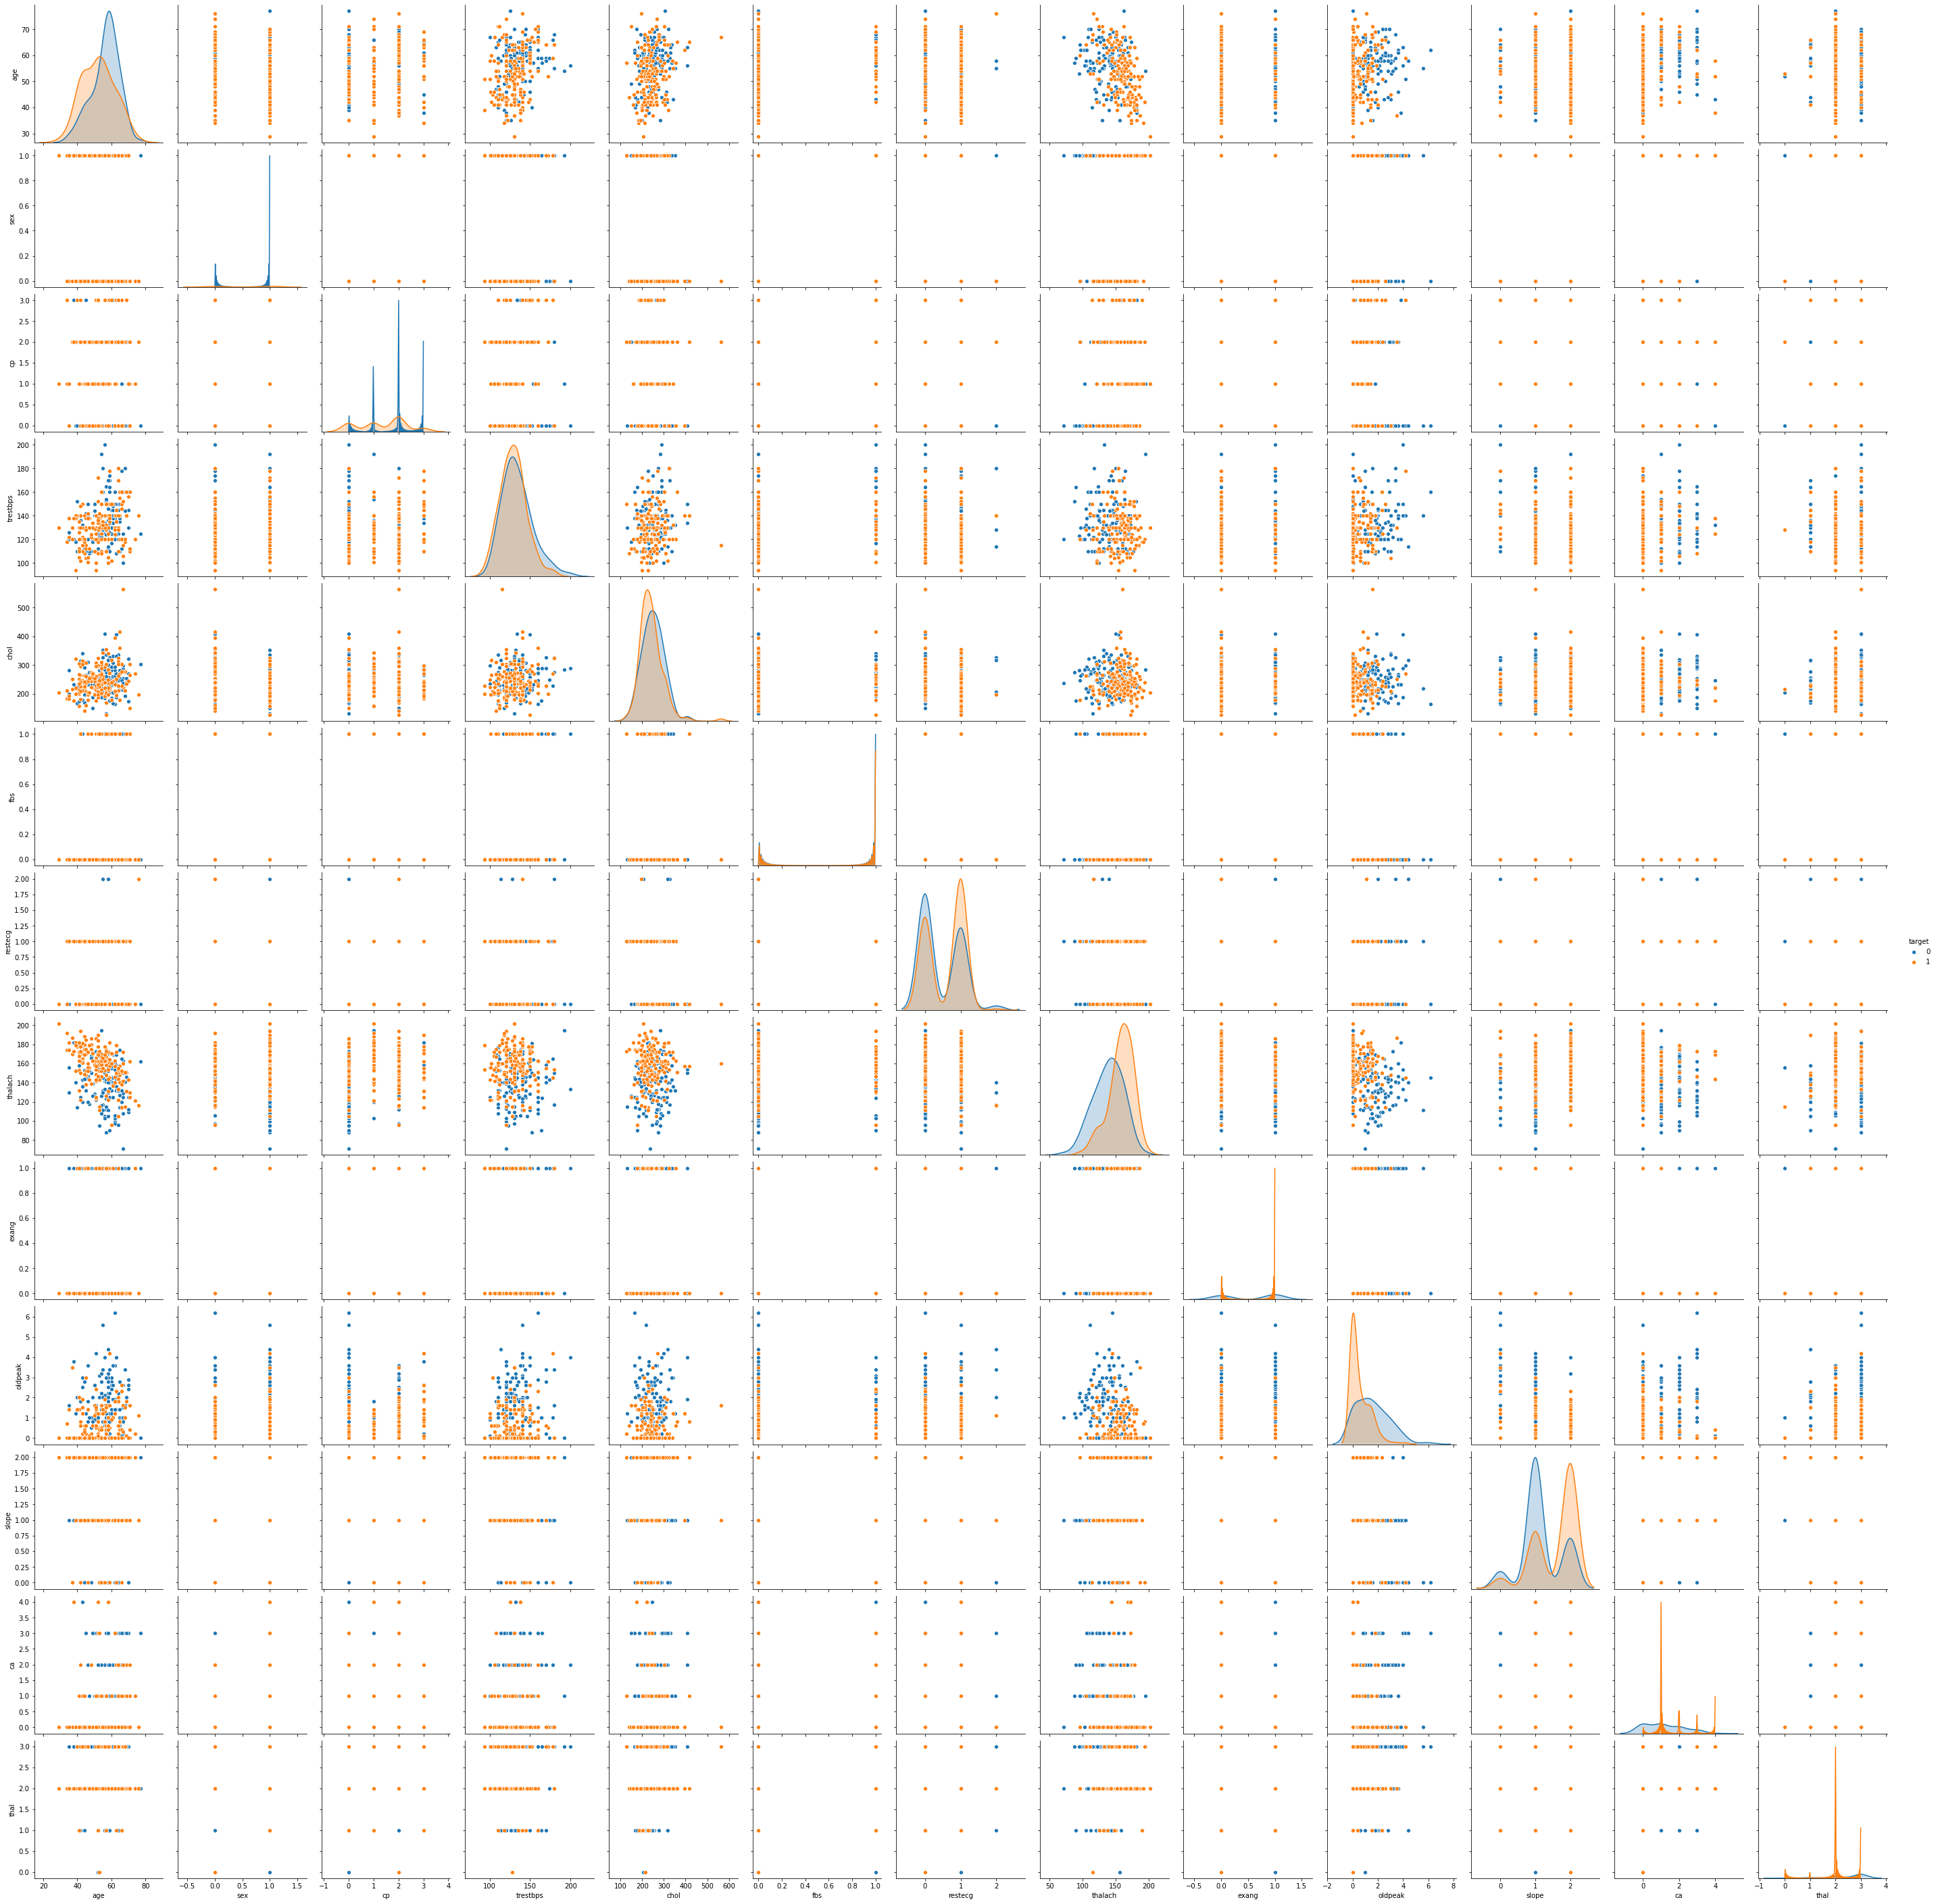

In [ ]:
sb.pairplot(dataset_heart, hue='target', size=3)

In [8]:
corr_metrix = dataset_heart.corr()
corr_metrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


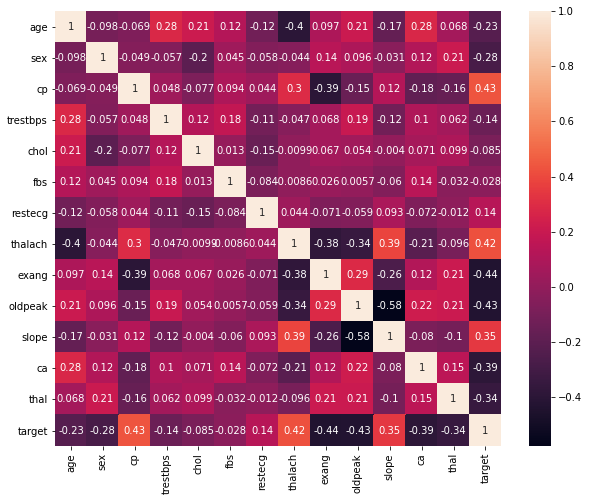

In [9]:
plt.figure(figsize=(10,8))
sb.heatmap(corr_metrix, annot=True)
plt.show()

In [30]:
# memisahkan data feature dan test
feature = dataset_heart.drop(['target'], axis=1)
label = dataset_heart['target']

In [31]:
# melakukan scaling pada data feature
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
feature_scaled = scaler.fit_transform(feature.values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [112]:
# memisahkan data train dan test pada data feature dan label
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.2, random_state=160)

# Melatih dan Evaluasi Model

## LogisticRegression

In [113]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(feature_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# prediksi
pred_logreg = logreg_model.predict(feature_test)

In [115]:
# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score.mean(),2))

0.92


In [116]:
from sklearn.metrics import classification_report
report_logreg = classification_report(label_test, pred_logreg)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [117]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred_logreg, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[28  4]
 [ 3 26]]


## RendomForest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=1000, max_depth=5, criterion='entropy', max_features='sqrt')
rfc_model.fit(feature_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
# prediksi
pred_rfc = rfc_model.predict(feature_test)

In [120]:
# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.9214135864135864


In [121]:
from sklearn.metrics import classification_report
report_rfc = classification_report(label_test, pred_rfc)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [122]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred_rfc, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[25  7]
 [ 3 26]]


## SVC

In [123]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1, gamma='scale')
svc_model.fit(feature_train, label_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
# prediksi
pred_svc = svc_model.predict(feature_test)

In [125]:
# melihat akurasi cross_val_score pada data train
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(round(score.mean(),2))

0.92


In [126]:
from sklearn.metrics import classification_report
report_svc = classification_report(label_test, pred_svc)
print(report_svc)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [127]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred_svc, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[28  4]
 [ 3 26]]


## DecisionTreeClassifier

In [128]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(feature_train, label_train)

# prediksi
feature_pred = tree_model.predict(feature_test)

# cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(tree_model, feature_train, label_train, cv=10, scoring='roc_auc')
print(score.mean())

0.7556293706293706


In [129]:
from sklearn.metrics import classification_report
report_tree = classification_report(label_test, feature_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.79      0.66      0.72        29

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [130]:
# hasil confusion matrix dari hasil prediksi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, feature_pred, labels=[0, 1])
print('Confussion Matrixnya : \n', cm)

Confussion Matrixnya : 
 [[27  5]
 [10 19]]


# Kesimpulan:
- Algoritma yang saya pakai diatas merupakan yang terbaik yang telah saya coba atur tuning hyperparameternya
- Dari beberapa model yang dilatih yang memiliki hasil yang mendekati akurat atau bagus yaitu model dengan algoritma *SVC*
- Dari hasil model dengan algoritma SVC dapat dilihat bahwa cros_validation data trainingnya mencapai rata-rata 0.92 dan untuk data testnya dengan hasil f1_score 0.89, recall 0.89 dan precision 0.88 berarti hasil akurasi data testing mendekati hasil data training (akurasi bagus) tidak overfitting.
- Hasil akurasi bagus tersebut dapat dilihan dari confusion matrik yang memprediksi TP, FP, TN, FN dimana memprediksi label_test kategori 0 (sehat) lebih banyak benarnya (28 True dan 4 False) begitu juga label_test kategori 1 (sakit) prediksi benarnya lebih banyak (26 True 3 False).